In [30]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from statsmodels.api import OLS
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [31]:
training_data = pd.read_csv("house-prices-advanced-regression-techniques/stringless_train.csv", index_col="Id")
testing_data = pd.read_csv("house-prices-advanced-regression-techniques/stringless_test.csv", index_col="Id")
training_data.shape, testing_data.shape

# OLS starts here

In [40]:
X_train, X_test = training_data.iloc[:,:-1], testing_data
#X_test
y_train = training_data.iloc[:,-1:]
#y_test.drop(['SalePrice'], axis=1, inplace=True)
display(X_train.head(), y_train.head())

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,548.0,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,460.0,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,608.0,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,642.0,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,836.0,192,84,0,0,0,0,0,12,2008


,SalePrice
0,208500.0
1,181500.0
2,223500.0
3,140000.0
4,250000.0


In [44]:
OLS_model = OLS(y_train, X_train).fit()
OLS_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              1372.
Date:                Fri, 28 Oct 2022   Prob (F-statistic):                        0.00
Time:                        12:37:03   Log-Likelihood:                         -17307.
No. Observations:                1460   AIC:                                  3.468e+04
Df Residuals:                    1426   BIC:                                  3.486e+04
Df Model:                          34                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
MSSubClass     -167.2273     26.432     -6.327      0.000    -219.076    -115.378
LotFrontage       9.2093     28.494      0.323      0.747     -46.685      65.103
LotArea           0.3944      0.100      3.954      0.000       0.199       0.590
OverallQual    1.732e+04   1178.359     14.694      0.000     1.5e+04    1.96e+04
OverallCond    5096.0832   1021.550      4.989      0.000    3092.180    7099.986
YearBuilt       339.5647     60.235      5.637      0.000     221.406     457.724
YearRemodAdd    122.9546     65.960      1.864      0.063      -6.434     252.343
MasVnrArea       28.2207      5.905      4.779      0.000      16.638      39.803
BsmtFinSF1        9.5709      2.507      3.818      0.000       4.654      14.488
BsmtFinSF2        0.0812      4.470      0.018      0.986      -8.686       8.849
BsmtUnfSF        -0.5513      2.392     -0.230      0.818      -5.243       4.141
TotalBsmtSF       9.1007      3.339      2.726      0.006       2.552      15.650
1stFlrSF         18.4020      6.068      3.033      0.002       6.498      30.306
2ndFlrSF         19.7753      5.634      3.510      0.000       8.723      30.828
LowQualFinSF     -9.8001     14.682     -0.667      0.505     -38.601      19.001
GrLivArea        28.3772      5.618      5.051      0.000      17.356      39.399
BsmtFullBath   8476.9859   2586.831      3.277      0.001    3402.583    1.36e+04
BsmtHalfBath   1778.8371   4049.486      0.439      0.661   -6164.753    9722.427
FullBath       3160.2663   2793.446      1.131      0.258   -2319.439    8639.971
HalfBath      -1972.1768   2638.092     -0.748      0.455   -7147.134    3202.781
BedroomAbvGr  -1.027e+04   1678.601     -6.121      0.000   -1.36e+04   -6982.026
KitchenAbvGr  -1.571e+04   5181.911     -3.031      0.002   -2.59e+04   -5543.909
TotRmsAbvGrd   4995.3637   1226.210      4.074      0.000    2589.994    7400.733
Fireplaces     4105.3893   1755.685      2.338      0.020     661.387    7549.392
GarageYrBlt     -14.5566      2.681     -5.429      0.000     -19.816      -9.297
GarageCars     1.569e+04   2970.610      5.281      0.000    9860.275    2.15e+04
GarageArea        4.8786      9.708      0.503      0.615     -14.166      23.923
WoodDeckSF       25.8330      7.911      3.266      0.001      10.315      41.351
OpenPorchSF      -6.0105     15.032     -0.400      0.689     -35.499      23.478
EnclosedPorch    11.8945     16.690      0.713      0.476     -20.845      44.634
3SsnPorch        20.7067     31.072      0.666      0.505     -40.245      81.658
ScreenPorch      57.6505     17.026      3.386      0.001      24.251      91.050
PoolArea        -32.3946     23.440     -1.382      0.167     -78.375      13.586
MiscVal          -0.4748      1.

# OLS Model Prediction for 50% of missing housing data

In [42]:
OLS_y_prediction = OLS_model.predict(X_test)
OLS_y_prediction.head()

1460    119987.233794
1461    152825.066938
1462    173406.265514
1463    200755.198262
1464    195423.519520
dtype: float64

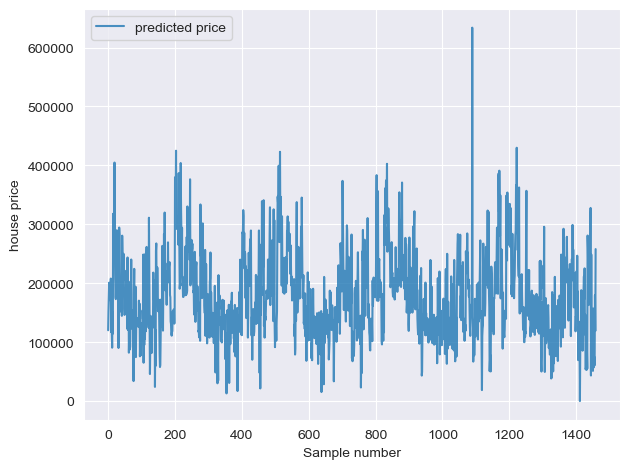

In [16]:
fig,ax = plt.subplots()
plt.plot(OLS_y_prediction.to_numpy(), alpha = 0.8,label=r"predicted price")
#plt.plot(y_test.to_nmpy(), alpha = 0.8,label=r"observed price")

#always label your axes
plt.xlabel(r"Sample number")
plt.ylabel(r"house price")

# create a legend
plt.legend(loc="upper left")
#ax.xaxis.set_minor_locator(MultipleLocator(2))
#ax.yaxis.set_minor_locator(MultipleLocator(0.2))
#plt.xlim(0,100)
#plt.ylim(0.5,6)

plt.tight_layout()
#plt.savefig("House_price_regression.png", dpi=600)
#sns.despine()
plt.show()

# Reverse OLS 50:50 split to verify that the prediction is correct

In [17]:
OLS_model_reverse = OLS(OLS_y_prediction, X_test).fit()
OLS_model_reverse_prediction = OLS_model.predict(X_train)
OLS_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              1372.
Date:                Fri, 28 Oct 2022   Prob (F-statistic):                        0.00
Time:                        12:19:12   Log-Likelihood:                         -17307.
No. Observations:                1460   AIC:                                  3.468e+04
Df Residuals:                    1426   BIC:                                  3.486e+04
Df Model:                          34                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
MSSubClass     -167.2273     26.432     -6.327      0.000    -219.076    -115.378
LotFrontage       9.2093     28.494      0.323      0.747     -46.685      65.103
LotArea           0.3944      0.100      3.954      0.000       0.199       0.590
OverallQual    1.732e+04   1178.359     14.694      0.000     1.5e+04    1.96e+04
OverallCond    5096.0832   1021.550      4.989      0.000    3092.180    7099.986
YearBuilt       339.5647     60.235      5.637      0.000     221.406     457.724
YearRemodAdd    122.9546     65.960      1.864      0.063      -6.434     252.343
MasVnrArea       28.2207      5.905      4.779      0.000      16.638      39.803
BsmtFinSF1        9.5709      2.507      3.818      0.000       4.654      14.488
BsmtFinSF2        0.0812      4.470      0.018      0.986      -8.686       8.849
BsmtUnfSF        -0.5513      2.392     -0.230      0.818      -5.243       4.141
TotalBsmtSF       9.1007      3.339      2.726      0.006       2.552      15.650
1stFlrSF         18.4020      6.068      3.033      0.002       6.498      30.306
2ndFlrSF         19.7753      5.634      3.510      0.000       8.723      30.828
LowQualFinSF     -9.8001     14.682     -0.667      0.505     -38.601      19.001
GrLivArea        28.3772      5.618      5.051      0.000      17.356      39.399
BsmtFullBath   8476.9859   2586.831      3.277      0.001    3402.583    1.36e+04
BsmtHalfBath   1778.8371   4049.486      0.439      0.661   -6164.753    9722.427
FullBath       3160.2663   2793.446      1.131      0.258   -2319.439    8639.971
HalfBath      -1972.1768   2638.092     -0.748      0.455   -7147.134    3202.781
BedroomAbvGr  -1.027e+04   1678.601     -6.121      0.000   -1.36e+04   -6982.026
KitchenAbvGr  -1.571e+04   5181.911     -3.031      0.002   -2.59e+04   -5543.909
TotRmsAbvGrd   4995.3637   1226.210      4.074      0.000    2589.994    7400.733
Fireplaces     4105.3893   1755.685      2.338      0.020     661.387    7549.392
GarageYrBlt     -14.5566      2.681     -5.429      0.000     -19.816      -9.297
GarageCars     1.569e+04   2970.610      5.281      0.000    9860.275    2.15e+04
GarageArea        4.8786      9.708      0.503      0.615     -14.166      23.923
WoodDeckSF       25.8330      7.911      3.266      0.001      10.315      41.351
OpenPorchSF      -6.0105     15.032     -0.400      0.689     -35.499      23.478
EnclosedPorch    11.8945     16.690      0.713      0.476     -20.845      44.634
3SsnPorch        20.7067     31.072      0.666      0.505     -40.245      81.658
ScreenPorch      57.6505     17.026      3.386      0.001      24.251      91.050
PoolArea        -32.3946     23.440     -1.382      0.167     -78.375      13.586
MiscVal          -0.4748      1.

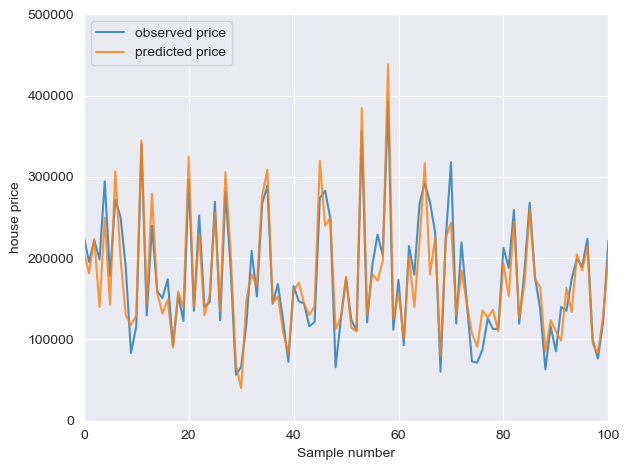

In [18]:
fig,ax = plt.subplots()
plt.plot(OLS_model_reverse_prediction.to_numpy(), alpha = 0.8,label=r"observed price")
plt.plot(y_train.to_numpy(), alpha=0.8, label=r"predicted price")

#always label your axes
plt.xlabel(r"Sample number")
plt.ylabel(r"house price")

# create a legend
plt.legend(loc="upper left")
#ax.xaxis.set_minor_locator(MultipleLocator(2))
#ax.yaxis.set_minor_locator(MultipleLocator(0.2))
plt.xlim(0,100)
plt.ylim(0,500000)
plt.tight_layout()
#plt.savefig("House_price_regression.png", dpi=600)
#sns.despine()
plt.show()

## Correlation Graph for OLS after prediction

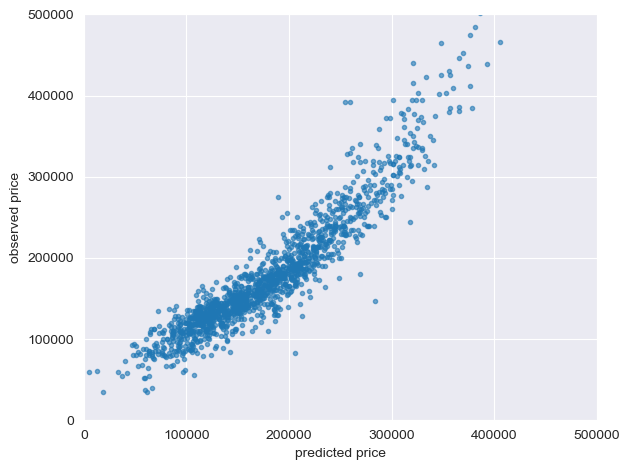

In [19]:
fig,ax = plt.subplots()
plt.plot(OLS_model_reverse_prediction.to_numpy(), y_train.to_numpy(), ".", alpha=0.6)

plt.xlabel(r"predicted price")
plt.ylabel(r"observed price")

plt.xlim(0,500000)
plt.ylim(0,500000)

plt.tight_layout()
#plt.savefig("predicted_house_price_regression_correlation.png", dpi=600)
plt.show()